## Classification IRIS dataset using Tensorflow

### import the libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.sample(5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


### Check whether is null

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data Exploration

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

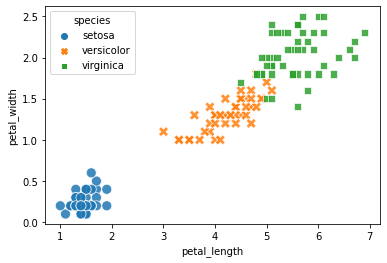

In [6]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', style='species', alpha=.85, edgecolor='w', s=100)

### Data prepocessing

In [8]:
y, class_names = pd.factorize(df.species, sort=True)

In [9]:
print(pd.unique(y))

[0 1 2]


In [11]:
class_names, y[45:105]

(Index(['setosa', 'versicolor', 'virginica'], dtype='object'),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int64))

### Feature selection

In [12]:
X = df.drop('species', axis=1)

In [13]:
X.sample(5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
X_sc = sc.fit_transform(X)

In [18]:
X_sc[:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

### Turn dataset into trainig set and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

In [21]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [22]:
y_train.shape, y_test.shape

((112,), (38,))

In [23]:
y_train[:5]

array([1, 2, 2, 0, 2], dtype=int64)

### Label One-hot encoding

#### make one-hot using tensorflow

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
def one_hot_encoding(arr):
	categories, ids = np.unique(arr, return_inverse=True)
	return to_categorical(ids, len(categories))

In [43]:
y_train_1h = one_hot_encoding(y_train).astype('int')

In [44]:
y_train_1h[:4]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [45]:
y_test_1h = one_hot_encoding(y_test).astype('int')

In [46]:
y_test_1h[:5]

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [47]:
type(y_train_1h), type(y_test_1h)

(numpy.ndarray, numpy.ndarray)

#### make one-hot using pandas

In [48]:
y_train_1h = pd.get_dummies(y_train).values

In [49]:
y_test_1h = pd.get_dummies(y_test).values

In [50]:
y_train_1h[:5]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [51]:
y_test_1h[:5]

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [53]:
type(y_train_1h), type(y_test_1h)

(numpy.ndarray, numpy.ndarray)

### Building a model

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [56]:
model = Sequential()

In [57]:
model.add(Dense(units=64, activation='relu',input_shape=(4,)))

In [58]:
model.add(Dense(units=3, activation='softmax'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 4),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 4),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 3,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initia

In [63]:
model.output_shape

(None, 3)

In [64]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
history = model.fit(X_train, y_train_1h, epochs=100, batch_size=8, verbose=1, validation_split=0.25 )

Epoch 1/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0316 - accuracy: 0.9881 - val_loss: 0.1729 - val_accuracy: 0.8929
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.9881 - val_loss: 0.1693 - val_accuracy: 0.8929
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.9881 - val_loss: 0.1694 - val_accuracy: 0.8929
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0314 - accuracy: 0.9881 - val_loss: 0.1702 - val_accuracy: 0.8929
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.9881 - val_loss: 0.1847 - val_accuracy: 0.9286
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0314 - accuracy: 0.9881 - val_loss: 0.1851 - val_accuracy: 0.9286
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9881 - val_loss: 0.1768 - val_accuracy: 0.8929
Epoch 8/100


In [99]:
score = model.evaluate(X_test, y_test_1h, verbose=0)

In [100]:
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.030931394547224045
Test accuracy 0.9736841917037964


In [101]:
model.metrics_names

['loss', 'accuracy']

In [102]:
y_pred = model.predict(X_test)

In [103]:
y_pred[:4].round(3)

array([[1.   , 0.   , 0.   ],
       [0.019, 0.98 , 0.   ],
       [0.   , 0.999, 0.001],
       [1.   , 0.   , 0.   ]], dtype=float32)

In [104]:
y_pred_cat = np.argmax(y_pred, axis=1)

In [105]:
y_pred_cat[:4]

array([0, 1, 1, 0], dtype=int64)

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

In [107]:
print(classification_report(y_test, y_pred_cat, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [108]:
print(confusion_matrix(y_test, y_pred_cat))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [113]:
df_hist = pd.DataFrame(history.history)

In [114]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 11}

In [115]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss')

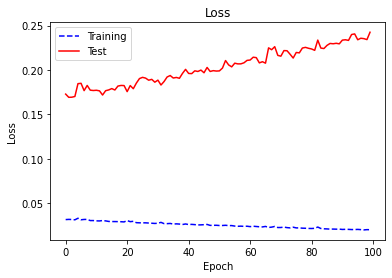

In [117]:
df_hist['loss'].plot(style='b--', label='Training')
df_hist['val_loss'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

Text(0.5, 1.0, 'model accuracy')

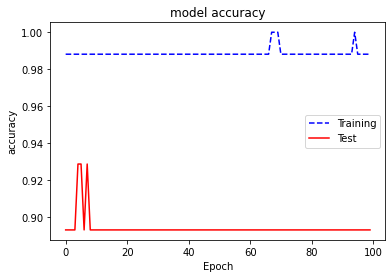

In [118]:
df_hist['accuracy'].plot(style='b--', label='Training')
df_hist['val_accuracy'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('model accuracy')

In [119]:
from keras.callbacks import TensorBoard

In [122]:
history = model.fit(X_train, y_train_1h, epochs=100, verbose=1, batch_size=32, validation_split=0.25,callbacks=[TensorBoard(log_dir='./log1')])

Epoch 1/100
3/3 [==============================] - 0s 71ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.3016 - val_accuracy: 0.8929
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.2983 - val_accuracy: 0.8929
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.2948 - val_accuracy: 0.8929
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.2913 - val_accuracy: 0.8929
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.2881 - val_accuracy: 0.8929
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.2869 - val_accuracy: 0.8929
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2866 - val_accuracy: 0.8929
Epoch 8/100
3/3 [===

In [123]:
%load_ext tensorboard
%tensorboard --logdir ./log1

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 292), started 0:01:05 ago. (Use '!kill 292' to kill it.)

### New data

In [124]:
X_new = [[8.1, 4.0, 5.9, 2.1],
	     [6.8, 3.6, 3.5, 1.4]]

In [125]:
X_new_sc = sc.transform(X_new)

c:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [126]:
y_pred_pr = model.predict(X_new_sc)

In [127]:
y_pred = np.argmax(y_pred_pr, axis=1)

In [129]:
print(class_names[y_pred])

Index(['virginica', 'versicolor'], dtype='object')


### plot decision

In [133]:
class Onehot2Int(object):
	def __init__(self, model) -> None:
		self.model = model
	def predict(self, X):
		y_pred = self.model.predict(X)
		return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)

In [131]:
from mlxtend.plotting import plot_decision_regions

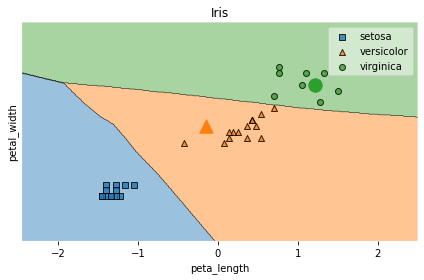

In [134]:
value = 0
width = 5.5

ax = plot_decision_regions(X_test, np.array(y_test),
							clf=model_no_ohe,
							feature_index=[2,3],
							filler_feature_values={0: value, 1:value},
							filler_feature_ranges={0:width, 1:width},
							legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=.5)
plt.title('Iris')
plt.yticks([])
plt.xlabel('peta_length')
plt.ylabel('petal_width')


# new data
plt.scatter(X_new_sc[:, 2][y_pred == 0], X_new_sc[:, 3][y_pred == 0], marker='s', s=180)
plt.scatter(X_new_sc[:, 2][y_pred == 1], X_new_sc[:, 3][y_pred == 1], marker='^', s=180)
plt.scatter(X_new_sc[:, 2][y_pred == 2], X_new_sc[:, 3][y_pred == 2], marker='o', s=180)
plt.tight_layout()